### Alec Tewsley-Booth
# Stationary trolley runs 7303-7305
The purpose of this study is to demonstrate that the high-noise fixed probe stations in the inflector chamber are able to track the real field drift (given enough averaging). Additionally, we also see evidence of the 2-minute oscillation in the skew-quadrupole.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.optimize

import gm2
import trfp

Welcome to JupyROOT 6.12/04


In [2]:
run_nums = [7303, 7304, 7305]

runs = {}

for num in run_nums:
    runs[num] = trfp.Run(num)

Trolley run.
Reading event 11340/11341 99.99%     
loop done: 100%                                    
Reading event 3930/3935 99.87%      
loop done: 100%                                    
Interpolating trolley position.
Interpolating trolley frequencies.
Interpolating fixed probe frequencies.
Finished calculating all moments for 5662 events.
Trolley run.
Reading event 11340/11350 99.91%   
loop done: 100%                                    
Reading event 3930/3937 99.82%   
loop done: 100%                                    
Interpolating trolley position.
Interpolating trolley frequencies.
Interpolating fixed probe frequencies.
Finished calculating all moments for 5666 events.
Trolley run.
Reading event 6520/6530 99.85%     
loop done: 100%                                    
Reading event 2260/2263 99.87%    
loop done: 100%                                    
Interpolating trolley position.
Interpolating trolley frequencies.
Interpolating fixed probe frequencies.
Finished calcul

In [3]:
stationary_df = runs[7303].moment_df.copy()
stationary_df = stationary_df.append(runs[7304].moment_df)
stationary_df = stationary_df.append(runs[7305].moment_df)

stationary_df['tr_phi'] = 4.065

In [20]:
def plt_unix_time_to_CST(ax):
    ax.locator_params(axis='x', nbins=7)
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                          for tm in xticks], rotation=30)

def plt_set_labels(ax, x_label, y_label, title):
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

def fig_watermark(fig, string):
    fig.text(0.5, 0.5, string,
         fontsize=24, color='black', rotation=45,
         ha='center', va='center', alpha=0.25)


## Inflector region tracking
The following plots show both the trolley m1 (dipole) and the three "noisy" fixed probes stations (stations 1, 3, and 5) versus time. In both cases the mean over time has been subtracted to put them on the same baseline. Note that the trolley is closest to positioned under station 3.

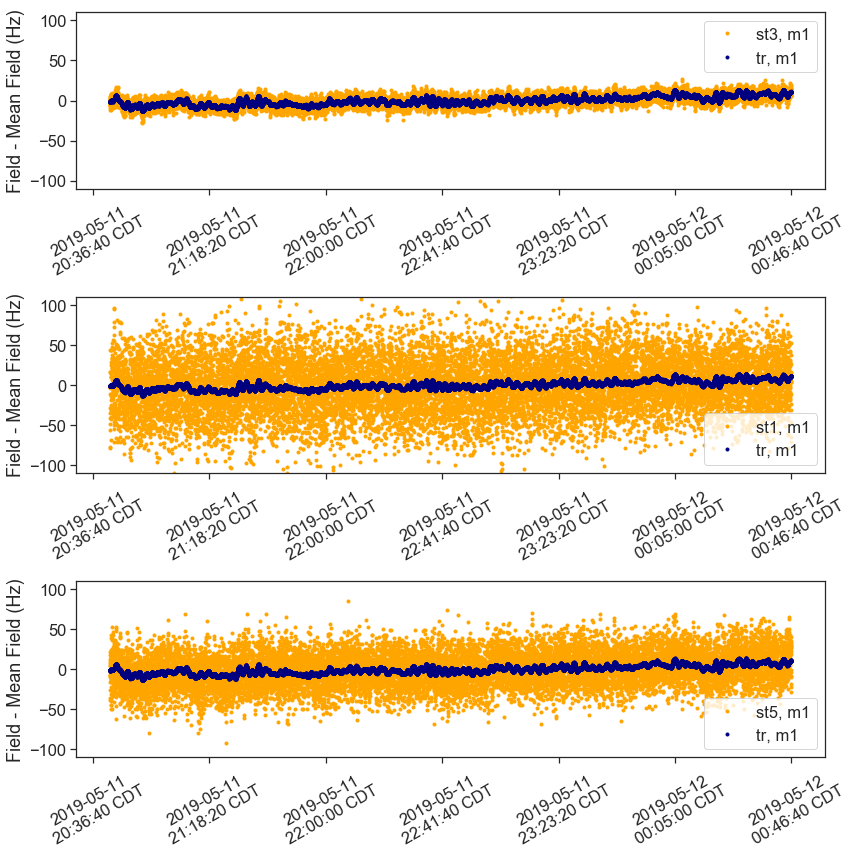

In [23]:
fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(stationary_df.index.values, stationary_df['st3,m1']-np.mean(stationary_df['st3,m1']), '.', color='orange',
        label='st3, m1')
plt.plot(stationary_df.index.values, stationary_df['tr,m1']-np.mean(stationary_df['tr,m1']), '.', color='navy',
        label='tr, m1')

plt.sca(axs[1])
plt.plot(stationary_df.index.values, stationary_df['st1,m1']-np.mean(stationary_df['st1,m1']), '.', color='orange',
        label='st1, m1')
plt.plot(stationary_df.index.values, stationary_df['tr,m1']-np.mean(stationary_df['tr,m1']), '.', color='navy',
        label='tr, m1')

plt.sca(axs[2])
plt.plot(stationary_df.index.values, stationary_df['st5,m1']-np.mean(stationary_df['st5,m1']), '.', color='orange',
        label='st5, m1')
plt.plot(stationary_df.index.values, stationary_df['tr,m1']-np.mean(stationary_df['tr,m1']), '.', color='navy',
        label='tr, m1')

for ax in axs:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field - Mean Field (Hz)')
    ax.set_ylim((-110,110))
    ax.legend()

fig.set_size_inches(12,12)
fig.tight_layout()

The general trends seem to match. The following plots show the same data but averaged into bins of 25 seconds.

In [38]:
bins = np.arange(1557626000, 1557640000, 25)-12.5
bin_centers = np.arange(1557626000, 1557639975, 25)

stationary_time_bin_df = stationary_df.groupby(pd.cut(stationary_df.index,bins)).mean()
stationary_time_bin_df.index = bin_centers


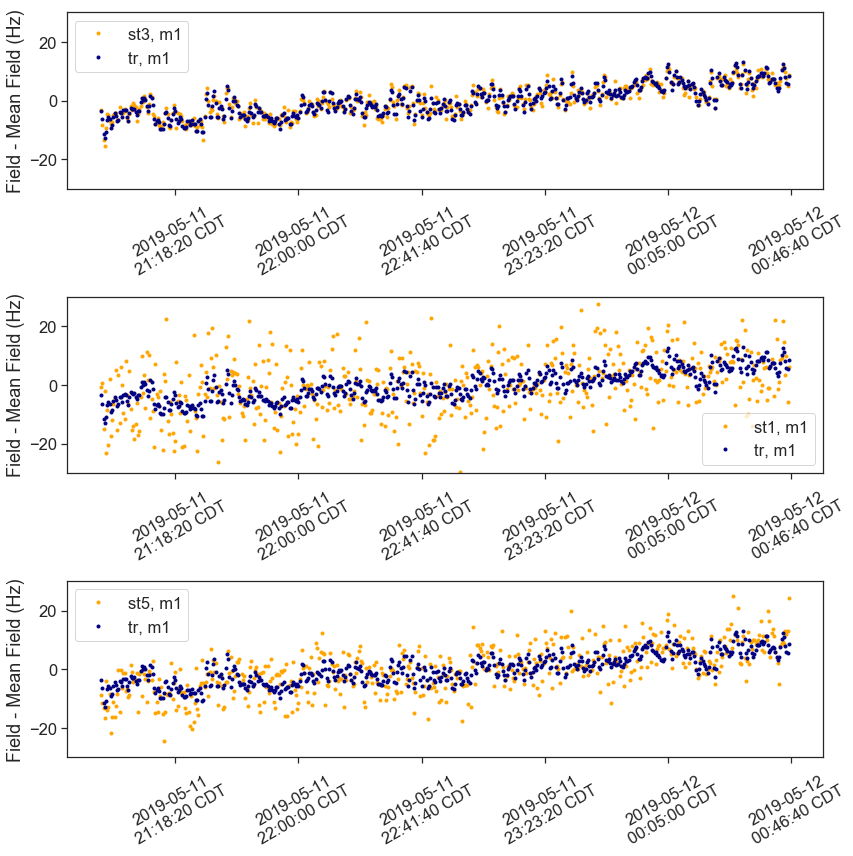

In [41]:
fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st3,m1']-np.mean(stationary_time_bin_df['st3,m1']), '.', color='orange',
         label='st3, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[1])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st1,m1']-np.mean(stationary_time_bin_df['st1,m1']), '.', color='orange',
         label='st1, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[2])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st5,m1']-np.mean(stationary_time_bin_df['st5,m1']), '.', color='orange',
         label='st5, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

for ax in axs:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field - Mean Field (Hz)')
    ax.set_ylim((-30,30))
    ax.legend()

fig.set_size_inches(12,12)
fig.tight_layout()


There is good agreement of long-term drift and structure, especially in station 3. The other two stations track better with longer averaging times as they are intrinsically noisier.

## 2-minute oscillation
This period shows the 2-minute signal clearly in the dipole. However, it is also clearly visible in the skew quadrupole (m3) of the trolley after 25 second averaging.

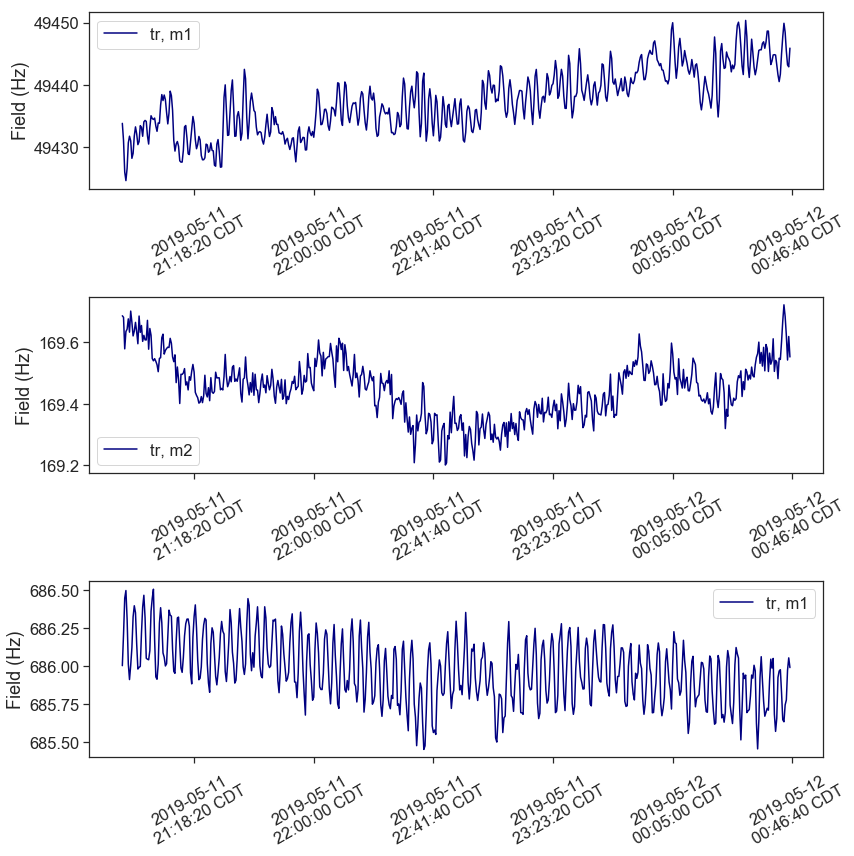

In [45]:
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(stationary_time_bin_df.index.values, stationary_time_bin_df['tr,m1'], '-', color='navy',
        label='tr, m1')

plt.sca(axs[1])
plt.plot(stationary_time_bin_df.index.values, stationary_time_bin_df['tr,m2'], '-', color='navy',
         label='tr, m2')

plt.sca(axs[2])
plt.plot(stationary_time_bin_df.index.values, stationary_time_bin_df['tr,m3'], '-', color='navy',
         label='tr, m1')

for ax in axs:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field (Hz)')
    ax.legend()

fig.set_size_inches(12,12)
fig.tight_layout()


The 2-minute signal is also visible in the dipole measurements of station 30 (and other stations, station 30 is chosen as a "typically good" station). However, it is not immediately visible in station 30's m3 measurement. This is likely due to the sensitivity of the fixed probe m3 to noise in higher-order moments causing noise in m3. Further study would be needed to determine whether we can extract the 2-minute signal from the fixed probe m3 measurements with further filtering.

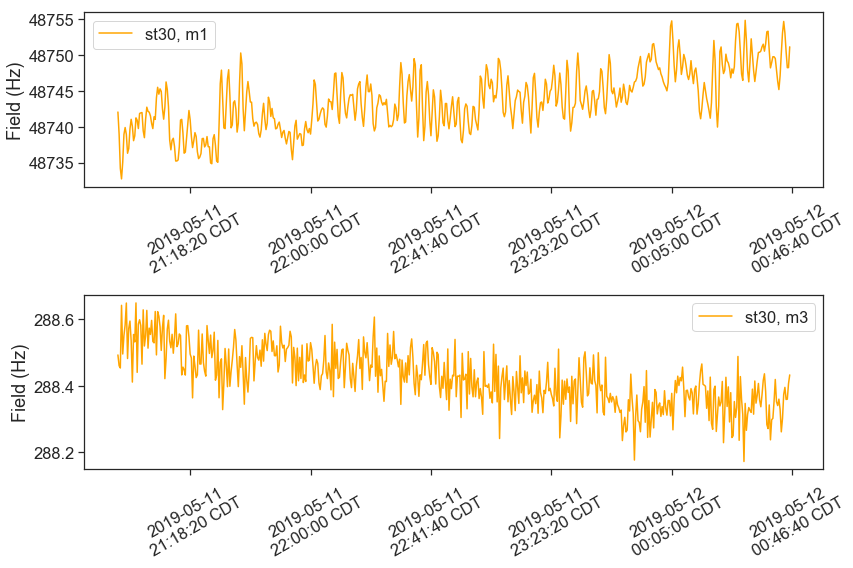

In [62]:
fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(stationary_time_bin_df.index.values, stationary_time_bin_df['st30,m1'], '-', color='orange',
        label='st30, m1')

plt.sca(axs[1])
plt.plot(stationary_time_bin_df.index.values, stationary_time_bin_df['st30,m3'], '-', color='orange',
         label='st30, m3')

for ax in axs:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field (Hz)')
    ax.legend()

fig.set_size_inches(12,8)
fig.tight_layout()

## Backup: Long averaging for tracking

The following plots show the inflector station m1 tracking for an averaging window of 250 seconds instead of 25.

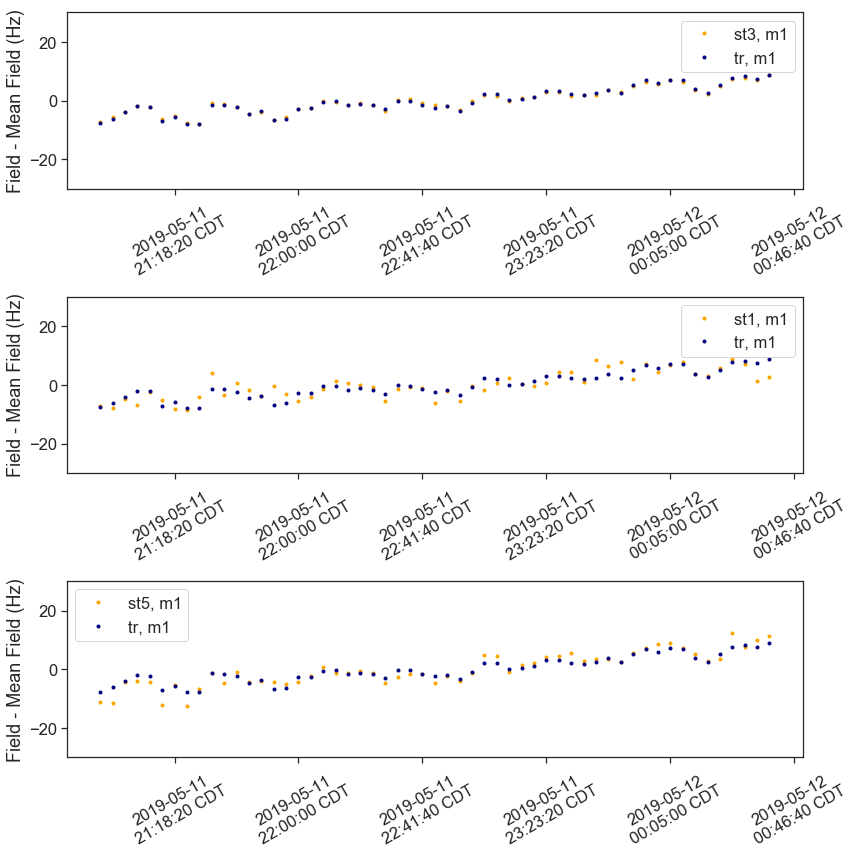

In [63]:
bins = np.arange(1557626000, 1557640000, 250)-125
bin_centers = np.arange(1557626000, 1557639750, 250)

stationary_time_bin_df = stationary_df.groupby(pd.cut(stationary_df.index,bins)).mean()
stationary_time_bin_df.index = bin_centers

fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st3,m1']-np.mean(stationary_time_bin_df['st3,m1']), '.', color='orange',
         label='st3, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[1])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st1,m1']-np.mean(stationary_time_bin_df['st1,m1']), '.', color='orange',
         label='st1, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[2])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st5,m1']-np.mean(stationary_time_bin_df['st5,m1']), '.', color='orange',
         label='st5, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

for ax in axs:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field - Mean Field (Hz)')
    ax.set_ylim((-30,30))
    ax.legend()

fig.set_size_inches(12,12)
fig.tight_layout()

